['.\\Image\\01.jpg', '.\\Image\\02.jpg', '.\\Image\\03.jpg', '.\\Image\\04.jpg', '.\\Image\\05.jpg', '.\\Image\\06.jpg', '.\\Image\\07.jpg', '.\\Image\\08.jpg', '.\\Image\\09.jpg', '.\\Image\\10.jpg', '.\\Image\\11.jpg', '.\\Image\\12.jpg', '.\\Image\\13.jpg', '.\\Image\\14.jpg', '.\\Image\\15.jpg', '.\\Image\\16.jpg', '.\\Image\\17.jpg', '.\\Image\\18.jpg', '.\\Image\\19.jpg', '.\\Image\\20.jpg', '.\\Image\\21.jpg', '.\\Image\\22.jpg', '.\\Image\\23.jpg', '.\\Image\\24.jpg', '.\\Image\\25.jpg', '.\\Image\\26.jpg', '.\\Image\\27.jpg', '.\\Image\\28.jpg', '.\\Image\\29.jpg', '.\\Image\\30.jpg', '.\\Image\\31.jpg', '.\\Image\\32.jpg', '.\\Image\\33.jpg', '.\\Image\\34.jpg', '.\\Image\\35.jpg', '.\\Image\\36.jpg', '.\\Image\\37.jpg', '.\\Image\\38.jpg', '.\\Image\\39.jpg', '.\\Image\\40.jpg', '.\\Image\\41.jpg', '.\\Image\\42.jpg', '.\\Image\\43.jpg', '.\\Image\\44.jpg', '.\\Image\\45.jpg', '.\\Image\\46.jpg', '.\\Image\\47.jpg', '.\\Image\\48.jpg', '.\\Image\\49.jpg', '.\\Image\\50.jpg',

biggest circle: [350 277 240]
radius: 137 195 240
All mean-std: 103.3688929177468
inner mean-std: 99.58419436385539
middle mean-std: 108.0256893473517
outer mean-std: 102.41539262247088
.\Image\33.jpg
size:388800
shape:(540, 720)
biggest circle: [362 257 241]
radius: 138 196 241
All mean-std: 108.35752627740827
inner mean-std: 102.6695761223978
middle mean-std: 107.56574189731116
outer mean-std: 114.64831853819737
.\Image\34.jpg
size:388800
shape:(540, 720)
biggest circle: [365 281 240]
radius: 137 195 240
All mean-std: 101.27117407429925
inner mean-std: 83.43723384401352
middle mean-std: 94.09002843351186
outer mean-std: 125.43277925964478
.\Image\35.jpg
size:388800
shape:(540, 720)
biggest circle: [362 275 240]
radius: 137 195 240
All mean-std: 108.82453832420391
inner mean-std: 112.08990346278483
middle mean-std: 107.57305098194801
outer mean-std: 106.92552533992583
.\Image\36.jpg
size:388800
shape:(540, 720)
biggest circle: [367 278 239]
radius: 137 195 239
All mean-std: 124.934644

.\Image\68.jpg
size:388800
shape:(540, 720)
biggest circle: [386 268 240]
radius: 137 195 240
All mean-std: 103.53191795132574
inner mean-std: 103.01937530751091
middle mean-std: 105.13314157243933
outer mean-std: 102.44787261726627
.\Image\69.jpg
size:388800
shape:(540, 720)
biggest circle: [400 260 240]
radius: 137 195 240
All mean-std: 128.2168563484913
inner mean-std: 134.20176108311702
middle mean-std: 132.2045559743437
outer mean-std: 118.55612842365493
.\Image\70.jpg
size:388800
shape:(540, 720)
biggest circle: [376 275 240]
radius: 137 195 240
All mean-std: 111.82505789947876
inner mean-std: 112.84586281196452
middle mean-std: 115.63343913244725
outer mean-std: 107.09953809121072
.\Image\71.jpg
size:388800
shape:(540, 720)
biggest circle: [388 268 239]
radius: 137 195 239
All mean-std: 100.90833068522018
inner mean-std: 101.74233555589488
middle mean-std: 100.52314355617271
outer mean-std: 100.47696029362696
.\Image\72.jpg
size:388800
shape:(540, 720)
biggest circle: [388 266 2

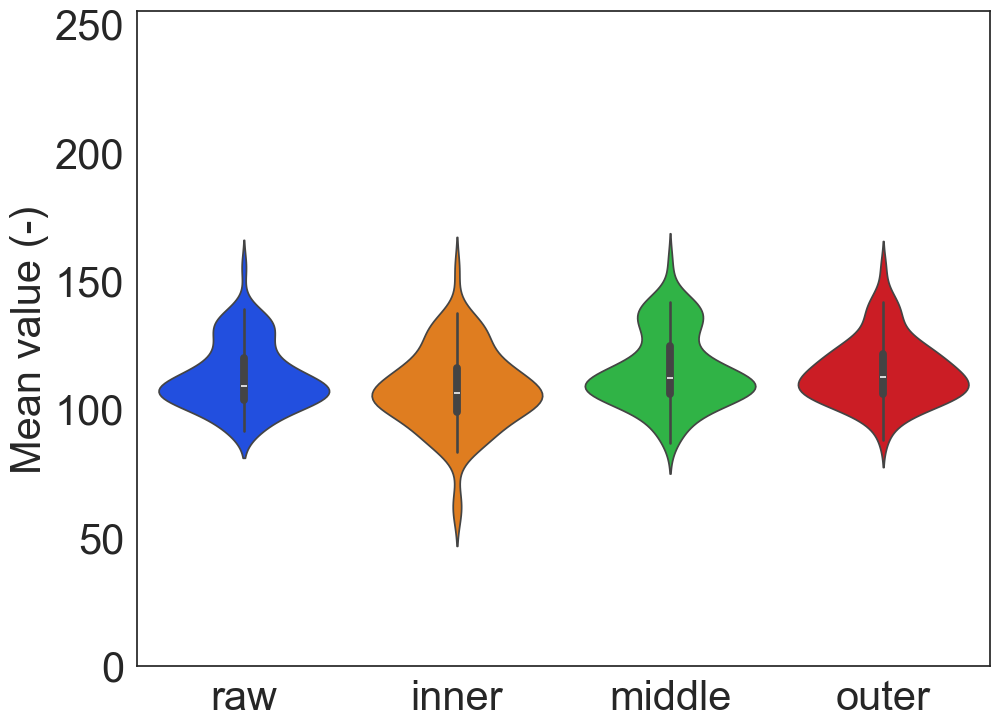

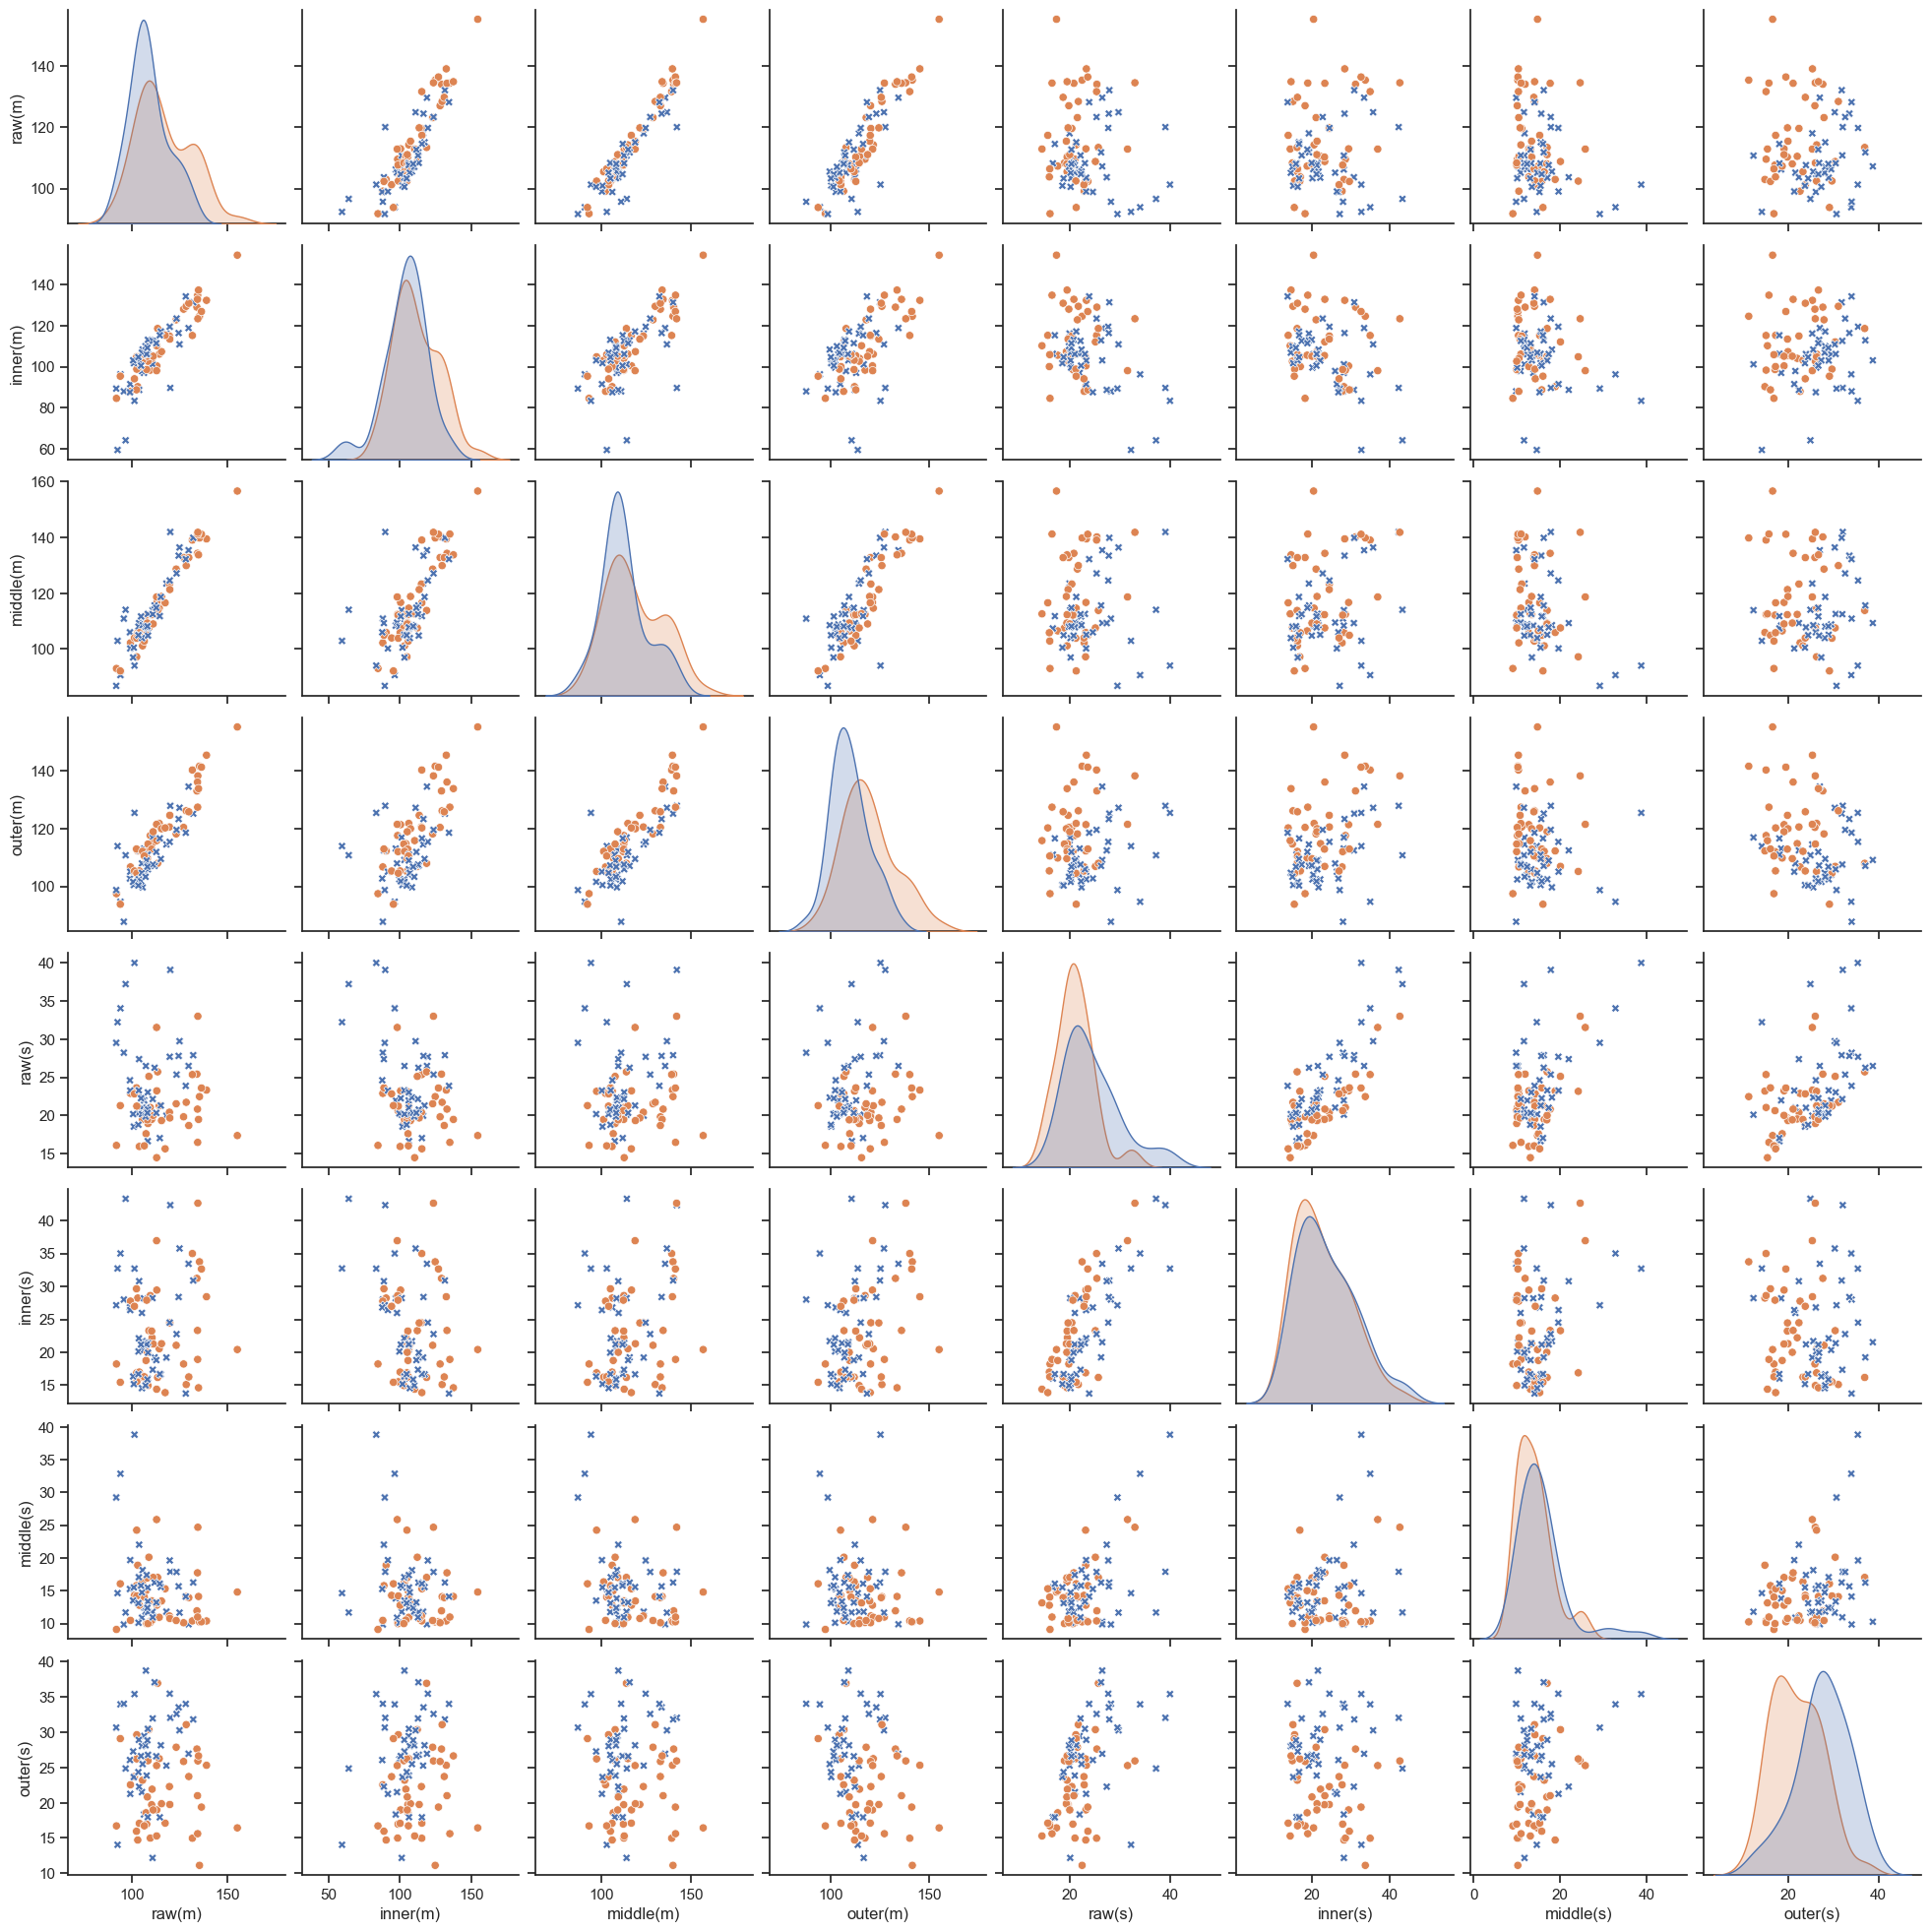

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import shutil

DEBUG = False
HARD_LIMIT_DIM = 500

# Define the path for images
path = r'.\Image\*.jpg'
filenames = glob.glob(path)
print(filenames)

# Define the labels for the DataFrame
labels = ['raw(m)', 'inner(m)', 'middle(m)', 'outer(m)', 'raw(s)', 'inner(s)', 'middle(s)', 'outer(s)']
df = pd.DataFrame(columns=labels)

for filename in filenames:
    # Read the image in grayscale
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    print(filename)

    # Resize the image (remove if GPU is enabled)
    img_resized = cv2.resize(img, dsize=None, fx=0.25, fy=0.25)
    cv2.imwrite('img.jpg', img_resized, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

    print('size:{}'.format(img_resized.size))
    print('shape:{}'.format(img_resized.shape))

    # Apply a median filter
    img_median = cv2.medianBlur(img_resized, 15)

    # Perform Hough Circle Transformation
    circles = cv2.HoughCircles(img_median, cv2.HOUGH_GRADIENT, 1.5, 50, param1=150, param2=100, minRadius=200, maxRadius=300)
    
    # Check if any circles are detected
    if circles is not None:
        circles = np.uint16(np.around(circles))
        img_edges_hough = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2BGR)
        
        # Draw all detected circles
        for i in circles[0, :]:
            cv2.circle(img_edges_hough, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(img_edges_hough, (i[0], i[1]), 2, (0, 0, 255), 3)
        
        # Extract the largest circle that doesn't exceed HARD_LIMIT_DIM
        biggestCircle = max(circles[0, :], key=lambda x: x[2] if x[2] <= HARD_LIMIT_DIM else 0)
        print('biggest circle:', biggestCircle)
        
        cv2.circle(img_edges_hough, (biggestCircle[0], biggestCircle[1]), biggestCircle[2], (255, 0, 0), 10)
        cv2.circle(img_edges_hough, (biggestCircle[0], biggestCircle[1]), 2, (255, 0, 0), 10)

        # Generate data set for ML
        a = 0.57350362
        b = 0.816496821

        # Calculate radii
        interRad = int(a * biggestCircle[2])
        midRad = int(b * biggestCircle[2])
        outerRad = int(biggestCircle[2])
        print('radius:', interRad, midRad, outerRad)

        # Create masks for different circle regions
        shape = img_edges_hough.shape[1::-1]
        interMask = np.zeros((shape[1], shape[0]), dtype=np.uint8)
        cv2.circle(interMask, center=(biggestCircle[0], biggestCircle[1]), radius=interRad, color=255, thickness=-1)

        midCircle = np.zeros((shape[1], shape[0]), dtype=np.uint8)
        cv2.circle(midCircle, center=(biggestCircle[0], biggestCircle[1]), radius=midRad, color=255, thickness=-1)

        outerCircle = np.zeros((shape[1], shape[0]), dtype=np.uint8)
        cv2.circle(outerCircle, center=(biggestCircle[0], biggestCircle[1]), radius=outerRad, color=255, thickness=-1)

        midMask = ~interMask & midCircle
        outerMask = ~midCircle & outerCircle

        # Normalize the image
        norm = cv2.normalize(img_resized, None, alpha=5, beta=250, norm_type=cv2.NORM_MINMAX, mask=outerCircle)
        all_mean, all_std = cv2.meanStdDev(norm, mask=outerCircle)
        
        inner = norm.copy()
        middle = norm.copy()
        outer = norm.copy()

        # Edge detection using Canny
        img_edges = cv2.Canny(norm, 300, 300)
        inner_edge = img_edges.copy()
        middle_edge = img_edges.copy()
        outer_edge = img_edges.copy()

        inner[interMask == 0] = [255]
        middle[midMask == 0] = [255]
        outer[outerMask == 0] = [255]

        # Calculate mean and standard deviation for each region
        i_mean, i_std = cv2.meanStdDev(inner, mask=interMask)
        m_mean, m_std = cv2.meanStdDev(middle, mask=midMask)
        o_mean, o_std = cv2.meanStdDev(outer, mask=outerMask)
        all_edge_mean, all_edge_std = cv2.meanStdDev(img_edges, mask=outerCircle)
        i_edge_mean, i_edge_std = cv2.meanStdDev(img_edges, mask=interMask)
        m_edge_mean, m_edge_std = cv2.meanStdDev(img_edges, mask=midMask)
        o_edge_mean, o_edge_std = cv2.meanStdDev(img_edges, mask=outerMask)

        print('All mean-std:', all_mean[0][0])
        print('inner mean-std:', i_mean[0][0])
        print('middle mean-std:', m_mean[0][0])
        print('outer mean-std:', o_mean[0][0])

        # Create a temporary DataFrame to store the results
        temp = [[all_mean[0][0], i_mean[0][0], m_mean[0][0], o_mean[0][0], all_std[0][0], i_std[0][0], m_std[0][0], o_std[0][0]]]
        df_temp = pd.DataFrame(temp, columns=labels)

        # Append the results to the main DataFrame
        df = pd.concat([df, df_temp], axis=0, ignore_index=True)

        # Plot and save images for debugging
        if DEBUG:
            l = 3
            m = 4
            i = 0

            i += 1
            ax = plt.subplot(l, m, i)
            plt.axis('off')
            plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
            ax.set_title('img_resized')

            i += 1
            ax = plt.subplot(l, m, i)
            plt.axis('off')
            plt.imshow(cv2.cvtColor(img_median, cv2.COLOR_BGR2RGB))
            ax.set_title('img_median')

            i += 1
            ax = plt.subplot(l, m, i)
            plt.axis('off')
            plt.imshow(cv2.cvtColor(img_edges, cv2.COLOR_BGR2RGB))
            ax.set_title('img_edges')

            i += 1
            ax = plt.subplot(l, m, i)
            plt.axis('off')
            plt.imshow(cv2.cvtColor(img_edges_hough, cv2.COLOR_BGR2RGB))
            ax.set_title('img_edges_hough')

            i += 1
            ax = plt.subplot(l, m, i)
            plt.axis('off')
            plt.imshow(cv2.cvtColor(norm, cv2.COLOR_BGR2RGB))
            ax.set_title('norm')

            i += 1
            ax = plt.subplot(l, m, i)
            plt.axis('off')
            plt.imshow(cv2.cvtColor(interMask, cv2.COLOR_BGR2RGB))
            ax.set_title('interMask')

            i += 1
            ax = plt.subplot(l, m, i)
            plt.axis('off')
            plt.imshow(cv2.cvtColor(midMask, cv2.COLOR_BGR2RGB))
            ax.set_title('midMask')

            i += 1
            ax = plt.subplot(l, m, i)
            plt.axis('off')
            plt.imshow(cv2.cvtColor(outerMask, cv2.COLOR_BGR2RGB))
            ax.set_title('outerMask')

            i += 1
            ax = plt.subplot(l, m, i)
            plt.axis('off')
            plt.imshow(cv2.cvtColor(inner_edge, cv2.COLOR_BGR2RGB))
            ax.set_title('inner_edge')

            i += 1
            ax = plt.subplot(l, m, i)
            plt.axis('off')
            plt.imshow(cv2.cvtColor(middle_edge, cv2.COLOR_BGR2RGB))
            ax.set_title('middle_edge')

            i += 1
            ax = plt.subplot(l, m, i)
            plt.axis('off')
            plt.imshow(cv2.cvtColor(outer_edge, cv2.COLOR_BGR2RGB))
            ax.set_title('outer_edge')

            plt.show()
            plt.clf()
    else:
        print("No circles were found in this image.")

#-- print and save data --#
RDE = np.loadtxt('ORR.csv')

T_value = 2.082677039
ON_error = 0.07
ON_line_upper = (1+ON_error)*T_value
ON_line_lower = (1-ON_error)*T_value

folder = ['Image']  # Save location
Slope = []
# Slope.append('result')

for l in range(len(RDE)):
    if RDE[l] < ON_line_lower:
        Slope.append(0)
    elif RDE[l] > ON_line_upper:
        Slope.append(0)
    else:
        Slope.append(1)

print(Slope)
result = pd.DataFrame(Slope, columns=['result'])
print(result)

df = pd.concat([df, result], axis=1, ignore_index=False)
df.to_csv('result.csv')

# Violin plot
plt.style.use('default')
sns.set()
sns.set_style('white')
sns.set_palette('bright')

df = pd.read_csv('result.csv', index_col=0)
df = df.drop(columns=['raw(s)', 'inner(s)', 'middle(s)', 'outer(s)', 'result'])
df = df.rename(columns={'raw(m)': 'raw', 'inner(m)': 'inner', 'middle(m)': 'middle', 'outer(m)': 'outer'})

fig = plt.figure(figsize=[11, 8.5])
ax = fig.add_subplot(1, 1, 1)
sns.violinplot(data=df, ax=ax)
fontsize = 30
ax.set_ylabel('Mean value (-)', fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
ax.set_ylim(0, 255)
sns.set(font_scale=1, style='ticks')
plt.savefig("img_violin_pub.tif", format="tif", dpi=300)
plt.show()

# Load data for training
data = pd.read_csv("result.csv", sep=",")

# Independent variables
columns = ['raw(m)', 'inner(m)', 'middle(m)', 'outer(m)', 'raw(s)', 'inner(s)', 'middle(s)', 'outer(s)']
data_x = data.loc[:, columns].values

# Dependent variable
data_y = data['result'].values

pp = data.dropna(subset=['result'])
pp = pp.replace({'result': {0: 'NG', 1: 'OK'}})
pp = pp.rename(columns={'result': 'Decision'})

pp1 = sns.pairplot(pp, hue='Decision', markers=['X', 'o'], vars=columns)
pp1._legend.remove()
pp1.savefig('pairplot.tif', format="tif", dpi=300)
plt.show()
